# Interesting Image Processing with OpenCV Python

When designing a complete vision system, there are a number of steps that are taken in order to improve the final performance of this system.  Some of these steps are situation-specific, and not subject to generalization.  Some of these methods may work in one situation, and fail in another application where another method may be more suitable.  These processes are usually performed in order to minimize variations of information in the image, before it undergoes an additional intermediate step in the vision process.  How we minimize these image variations will vary according to the application. 
In this chapter, and the following next two chapters we will introduce some of the processes that are found in many computer vision systems.  We will look in detail how each  of these steps can help us to extract useful information from our images in an efficient manner.  

This is a list of steps that are usually performed in many computer vision systems.  The order and composition of this list will vary, according to the particular application, and industry.   

Calibration
Image Acquisition
Preprocessing
Image Partitioning
Feature Extraction
Image Understanding and Classification

In this chapter we will explore the calibration and preprocessing steps of a computer vision system using Python.  These steps are necessary to help us acquire  images under the right conditions, thus making it possible to understand the digitized image and its properties.  These steps will also assist us in the understanding, and classification of these images.

## A brief introduction to calibration

A properly executed calibration process allows us to identify those qualities that are inherent to the camera,  that may cause distortions in the imaging process.  The calibration process helps us minimize these effects in the image acquisition process.  
There are many forms of image distortions that can be found in computer vision systems.    These distortions cause changes in the magnification of images, making magnification uneven and unreliable. They cause images that have perfect straight lines to be rendered curved, and appear curvilinear in the middle of the image. Others create optical distortions as you get close to the edges of the image.  These distortions have different causes, and go by different names, and a full examination and analysis into them, is beyond the scope of this book. We will instead focus our attention into algorithms that are available to us,  that help to prevent, and minimize these distortions.
The OpenCV library contains algorithms that are very helpful in the calibration process.  It contains ways of generating testing patterns that we can use in our calibration procedures.  It also contains algorithms that help to calibrate the camera with the introduction of  known calibration images in various angles, poses,  and orientations.  These algorithms can locate predetermined corners and grid locations, thus calculate the error coefficients and parameters.  We can then use this information to 'undistort', and remove these distortions from the images.
For those of you who want to generate your own patterns, you can include the following two programs into a calibration directory.  These programs are part of the OpenCV library documentation and can be found by following this link address. I have not included them in their totality in order to save space in this chapter. 
https://github.com/Itseez/opencv/blob/master/doc/pattern_tools/gen_pattern.py
https://github.com/Itseez/opencv/blob/master/doc/pattern_tools/svgfig.py

In order to use the code in both programs to generate various svg calibration patterns, it is necessary to  include it in the same directory with the gen_pattern.py file.  

A scalable vector graphics (svg) file is an XML-based vector image format for 2D graphics with support and interactivity and animation. Software can be programmed to render SVG images by using a library such as librsvg used by Gnome since 2000, or Batik. SVG images can also be rendered to any desired popular image format by using the free-software command utility ImageMagick (which also uses librsvg under the hood).

The following line has a few parameters that merit some explanation.  When you run the program with this line it will generate a pattern of 9 columns, and 11 rows. It will save the pattern output image into a file called out.svg. This pattern will consist of asymmetrical circles, with units in mm, and a page height and width of 25.  These parameters can be changed depending in the type of image pattern that you are interested in.

shell$ python gen_pattern.py -c 9 -r 11 -o out.svg -T acircles -u mm -s 25


When you display the pattern image, in my case, I am using the display function found in ImageMagick,

shell$ display out.svg

I converted the image from a Scalable Vector Graphics image to a png image, or from out.svg to out.png, to make it easier and less memory intensive to include it here.

it will display the following image on the left.  In order to use the checkerboard pattern instead of the asymmetrical circles pattern.

shell$ python gen_pattern.py -c 9 -r 11 -o out.svg -T checkerboard -u mm -s 25


And it will display the image on the right.

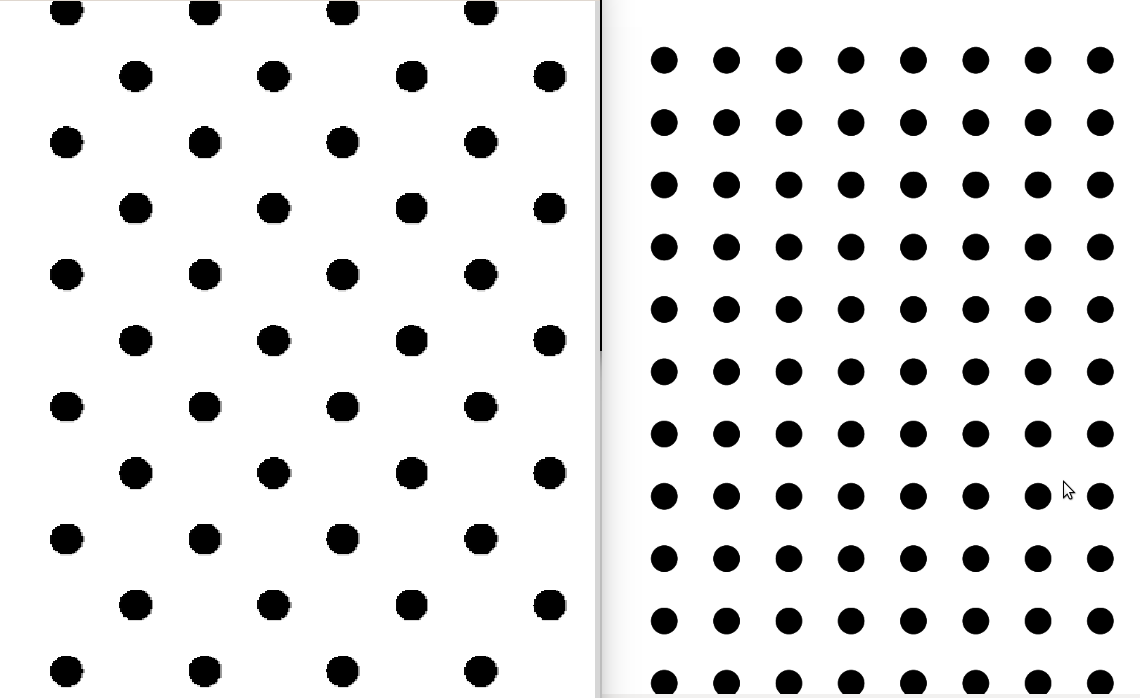

In [1]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_01.png') 

For those of us that instead of generating our own pattern, would rather use a predefined pattern, we can download one of the OpenCV chessboard patterns by going to this link,

http://docs.opencv.org/trunk/_downloads/pattern.png
Once downloaded we can print it, and tape it to a clear acrylic sheet transparent PMMA panel, or any other similar transparent material.  Transparency of the panel is very important in order to maximize image quality.  It is advisable to take 10 or more snapshots at different angles, poses, and orientations.  For additional ideas we can take a look at the sample pictures in the OpenCV library here,

https://github.com/Itseez/opencv_attic/blob/master/opencv/samples/cpp/left01.jpg
Once all the snapshots have been taken, we can put them in a calibration directory. In this directory we can include the following code, that can also be found here,
https://github.com/Itseez/opencv/blob/master/samples/python2/calibrate.py

#!/usr/bin/env python

import numpy as np
import cv2
import os

from common import splitfn



USAGE = '''
USAGE: calib.py [--save <filename>] [--debug <output path>] [--square_size] [<image mask>]
'''
if __name__ == '__main__':
    import sys, getopt
    from glob import glob
    args, img_mask = getopt.getopt(sys.argv[1:], '', ['save=', 'debug=', 'square_size='])
    args = dict(args)
    try: img_mask = img_mask[0]
    except: img_mask = 'left*.jpg'
    img_names = glob(img_mask)
    debug_dir = args.get('--debug')
    square_size = float(args.get('--square_size', 1.0))
    pattern_size = (9, 6)
    pattern_points = np.zeros( (np.prod(pattern_size), 3), np.float32 )
    pattern_points[:,:2] = np.indices(pattern_size).T.reshape(-1, 2)
    pattern_points *= square_size
    obj_points = []
    img_points = []
    h, w = 0, 0
    for fn in img_names:
        print 'processing %s...' % fn,
        img = cv2.imread(fn, 0)
        h, w = img.shape[:2]
        found, corners = cv2.findChessboardCorners(img, pattern_size)
        if found:

            term = ( cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1 )
            cv2.cornerSubPix(img, corners, (5, 5), (-1, -1), term)
        if debug_dir:
            vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
            cv2.drawChessboardCorners(vis, pattern_size, corners, found)
            path, name, ext = splitfn(fn)
            cv2.imwrite('%s/%s_chess.bmp' % (debug_dir, name), vis)
        if not found:
            print 'chessboard not found'
            continue
        img_points.append(corners.reshape(-1, 2))
        obj_points.append(pattern_points)
        print 'ok'
    rms, camera_matrix, dist_coefs, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, (w, h))
    print "RMS:", rms
    print "camera matrix:\n", camera_matrix
    print "distortion coefficients: ", dist_coefs.ravel()
    cv2.destroyAllWindows()

In the calibration directory you will have the snapshots, and the two files, common.py and calibrate.py, and your directory should look like this,

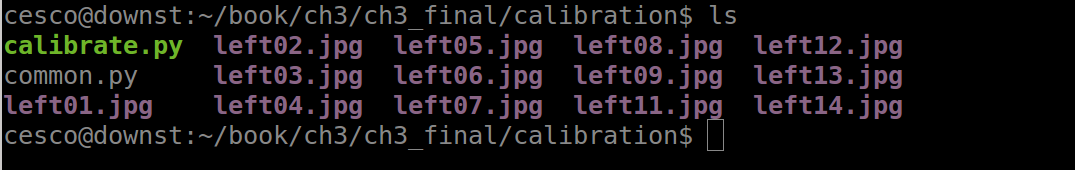

In [6]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_02.png') 

In order for this program to work you need to include the common.py file, and include it in the same directory with the images, and calibrate.py file.  The common.py file can be found here,  https://github.com/Itseez/opencv/blob/master/samples/python2/common.py
For consistency and to make it easier to follow and compare, I will be using the 'left01.jpg'  images from the samples page in the OpenCV library documentation page.

It is necessary to make sure that this line
except: img_mask = 'left*.jpg'

points to the right path. Here with this line, you are pointing to all .jpg images in the present directory.  If you download the code directly from the github repository, you need to make sure the line resembles the line above.

Now we are ready to run the python file calibrate.py,

shell$ python calibrate.py

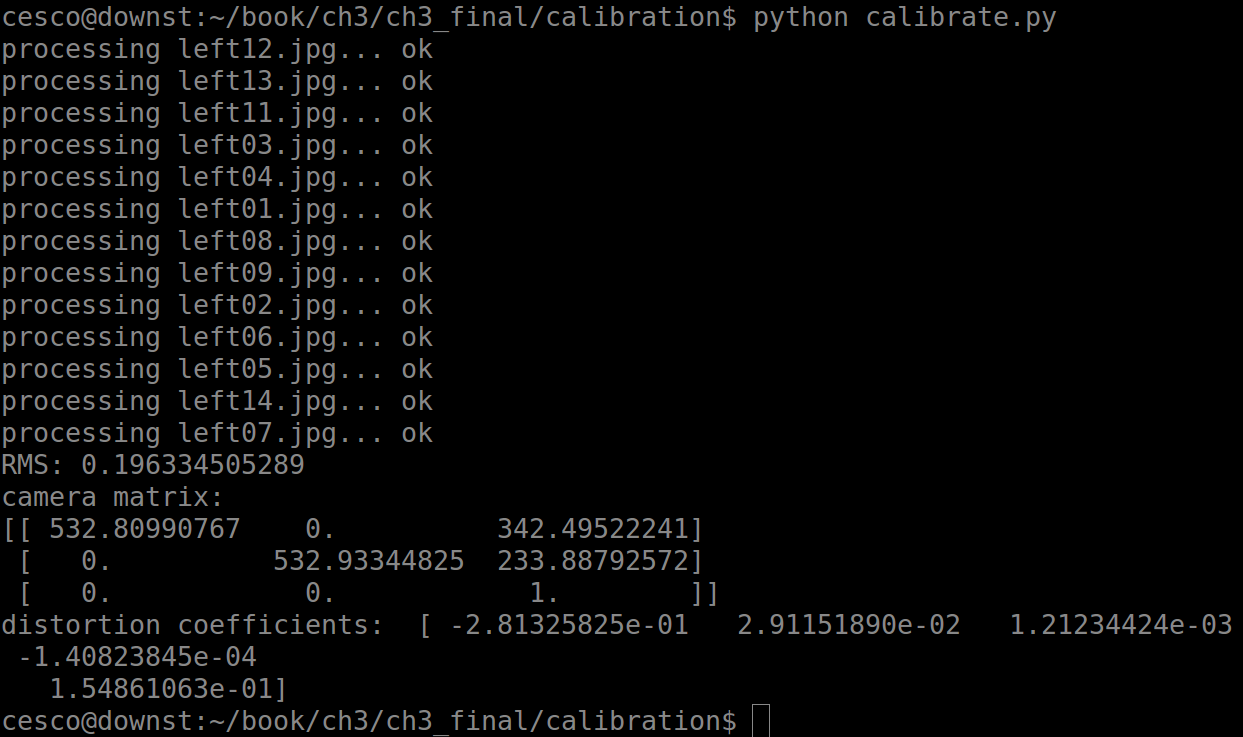

In [3]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_03.png') 

This code will go through all the images in your calibration directory and produce the RMS values,  camera matrix values, and the error coefficients. Taking note of the data produced by the calibrate.py program we are now ready for using these parameters to remove distortions in our images.
As we can see the code gives us the coefficients, but it does not really lets us know what is actually doing.  So I changed the code a bit, and added a few lines, and made a few changes.  I changed the waiting time from 500 ms to 3000 ms, so we are able to discern the corners , and grid patterns, as they are being drawn.  
# Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners,found)
        cv2.imshow('img',img)
        cv2.waitKey(3000)
    rms, camera_matrix, dist_coefs, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, (w, h))

I also added this line so we see the calibration points as they take place.    
#added this line from tutorials
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img.shape[::-1],None,None)

and the following lines, to show the undistorted image after taking the error coefficients,  and parameters to help remove the distortions.  This will produce a calibrated result image, calibresult.png, that we can compare with the original distorted image.

In [ ]:
#added this line from tutorials
img = cv2.imread('left12.jpg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

giving us the new calibrate_mine.py file seen here,
//calibrate_mine.py

In [ ]:
#!/usr/bin/env python

import numpy as np
import cv2
import os
from common import splitfn

USAGE = '''
USAGE: calib.py [--save <filename>] [--debug <output path>] [--square_size] [<image mask>]
'''

if __name__ == '__main__':
    import sys, getopt
    from glob import glob
    args, img_mask = getopt.getopt(sys.argv[1:], '', ['save=', 'debug=', 'square_size='])
    args = dict(args)
    try: img_mask = img_mask[0]
    except: img_mask = 'left*.jpg'
    img_names = glob(img_mask)
    debug_dir = args.get('--debug')
    square_size = float(args.get('--square_size', 1.0))
    pattern_size = (9, 6)
    pattern_points = np.zeros( (np.prod(pattern_size), 3), np.float32 )
    pattern_points[:,:2] = np.indices(pattern_size).T.reshape(-1, 2)
    pattern_points *= square_size
    obj_points = []
    img_points = []
    h, w = 0, 0

    for fn in img_names:
        print 'processing %s...' % fn,
        img = cv2.imread(fn, 0)
        h, w = img.shape[:2]
        found, corners = cv2.findChessboardCorners(img, pattern_size)
        if found:
            term = ( cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1 )
            cv2.cornerSubPix(img, corners, (5, 5), (-1, -1), term)
        if debug_dir:
            vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
            cv2.drawChessboardCorners(vis, pattern_size, corners, found)
            path, name, ext = splitfn(fn)
            cv2.imwrite('%s/%s_chess.bmp' % (debug_dir, name), vis)
        if not found:
            print 'chessboard not found'
            continue
        img_points.append(corners.reshape(-1, 2))
        obj_points.append(pattern_points)
        print 'ok'

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners,found)
        cv2.imshow('img',img)
        cv2.waitKey(300)
    rms, camera_matrix, dist_coefs, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, (w, h))
    #added this line from the tutorials page
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img.shape[::-1],None,None)
    print "RMS:", rms
    print "camera matrix:\n", camera_matrix
    print "distortion coefficients: ", dist_coefs.ravel()
    cv2.destroyAllWindows()

In [ ]:
#added these lines from the tutorials page
img = cv2.imread('left12.jpg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
#added these lines from the tutorials page
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

when we run the Python program, calibrate_mine.py, we get the following two images. 
 The image on the left is the original image, 'left12.jpg', and the image on the right is the 'calibresult.png'  output image.  The output image is the resulting image after running the correcting calibration program with the error coefficients, and parameters given to us by the top portion of the program. As you can see the curvilinear and bulging in the middle appearance in the lines of the image on the left have been corrected, and the lines appear perfectly straight on the image on the right. 

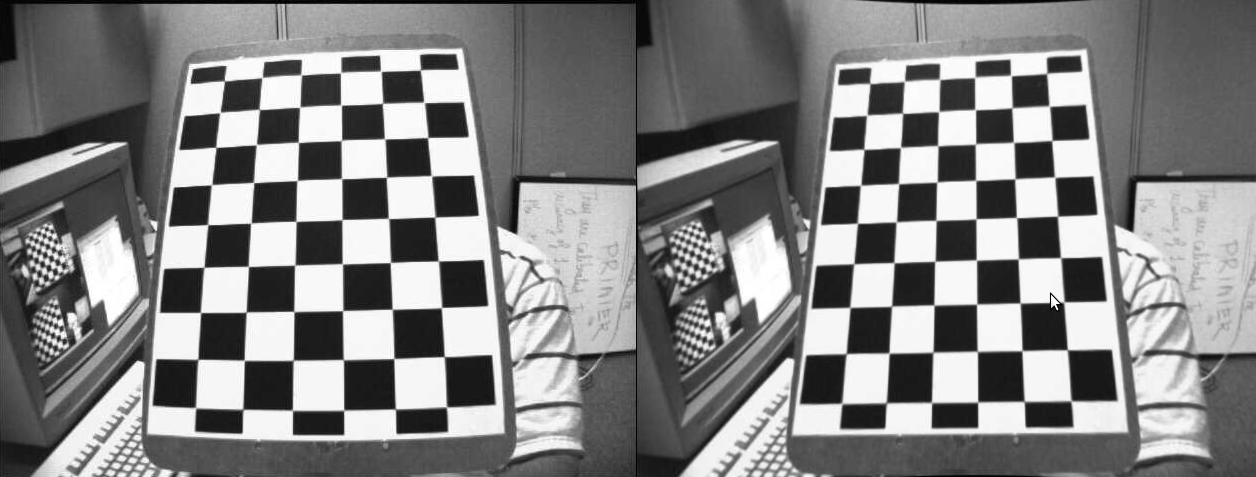

In [1]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_04.png') 

## Preprocessing : Histogram Equalization

In order to measure image contrast, we need to look at the brightness levels through the use of intensity histograms.  These intensity histograms allow us through the use of a plot to see how the image spreads through different brightness values.  By looking at these plots we can see how an image goes from 0 to 1, or  from black to bright(white). It makes it easy to see where the intensity is concentrated, and where in the axis we can stretch the plot, in order to take advantage unused values in between the two opposites. By stretching the image we improve the contrast of the image.

The following image needs to be read by a machine vision camera that needs to read the serial numbers on its face.  

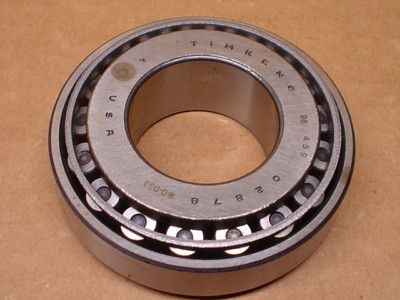

In [2]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_05.png') 

We take a histogram of the image with the following code,

In [ ]:
/hist_ravel.py
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

img = cv2.imread('bearings.png',0) 
plt.hist(img.ravel(),256,[0,256]) 
plt.show() 

the program reads the image using the cv2.imread function, and plots the histogram of a grayscale image, using a 0-256 intensity values. Another intermediate step that is used, is the use of the cv2.flatten() function to try to flatten the intensity distribution curve. This is done as an intermediate step before histogram equalization to try to improve the contrast of the image.

In [ ]:
//hist_flatten.py
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

img = cv2.imread('bearings.png') 
hist,bins = np.histogram(img.flatten(),256,[0,256]) 
plt.hist(img.flatten(),256,[0,256], color = 'r') 
plt.show() 

The image in the left is the one using the hist() function on a grayscale image, and the image in the right is the one using the hist(img.flatten()) function on an rgb image.

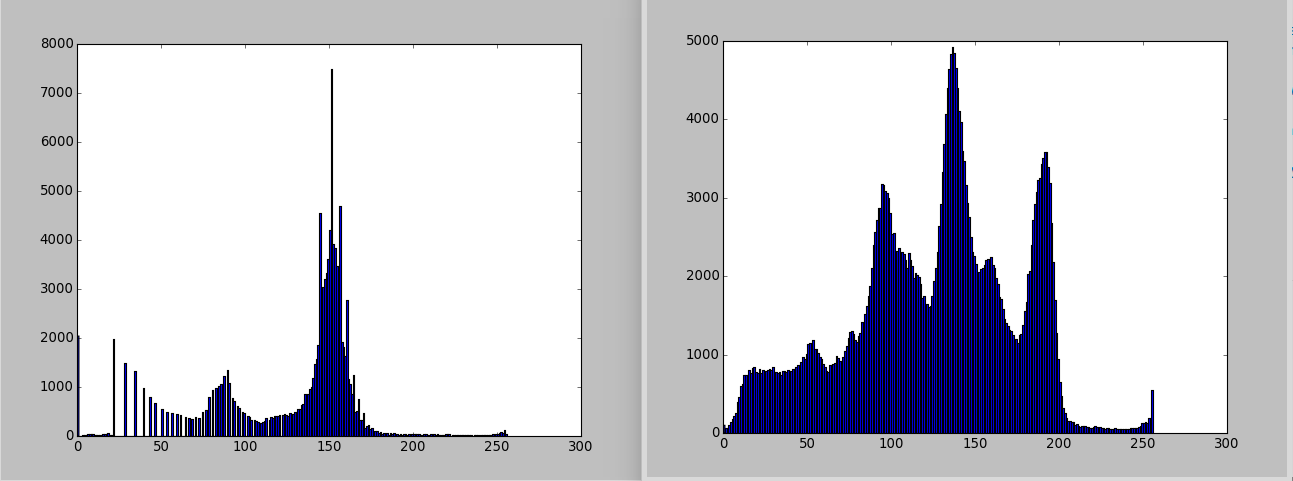

In [4]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_06.png') 

Now we are ready to use our histogram equalization function on the image, by using the following code,

In [ ]:
//hist.py
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

img = cv2.imread('bearings.png') 
gray = cv2.imread('bearings.png',0) 
equ = cv2.equalizeHist(gray) 
res = np.hstack((gray,equ)) 
plt.figure(figsize=(10, 4)) 
plt.subplot(131) 
plt.imshow(img, cmap=plt.cm.gray) 
plt.title('Original', fontsize=12) 
plt.axis('off') 

 plt.subplot(132) 
plt.imshow(gray, cmap=plt.cm.gray, vmin=0, vmax=255) 
plt.title('Grayscale', fontsize=12) 
plt.axis('off') 

plt.subplot(133) 
plt.imshow(res, cmap=plt.cm.gray, vmin=0, vmax=230) 
plt.title('Equalized', fontsize=12) 
plt.axis('off') 

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05, 
                    right=0.99) 
plt.show()

In the code above we read the image, convert to grayscale, use the equalizeHist() function on the grayscale image, and print them side by side. And we get the following image after undergoing histogram equalization, with the image on the left the grayscale of the original image, and the image on the right the equalized image.

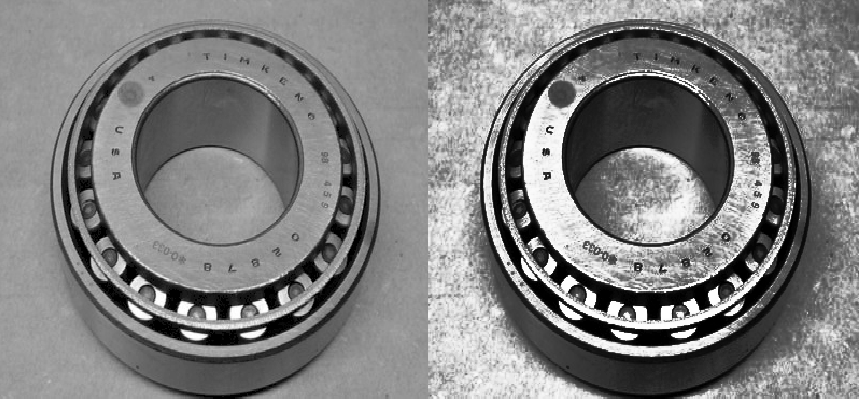

In [7]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_07.png') 

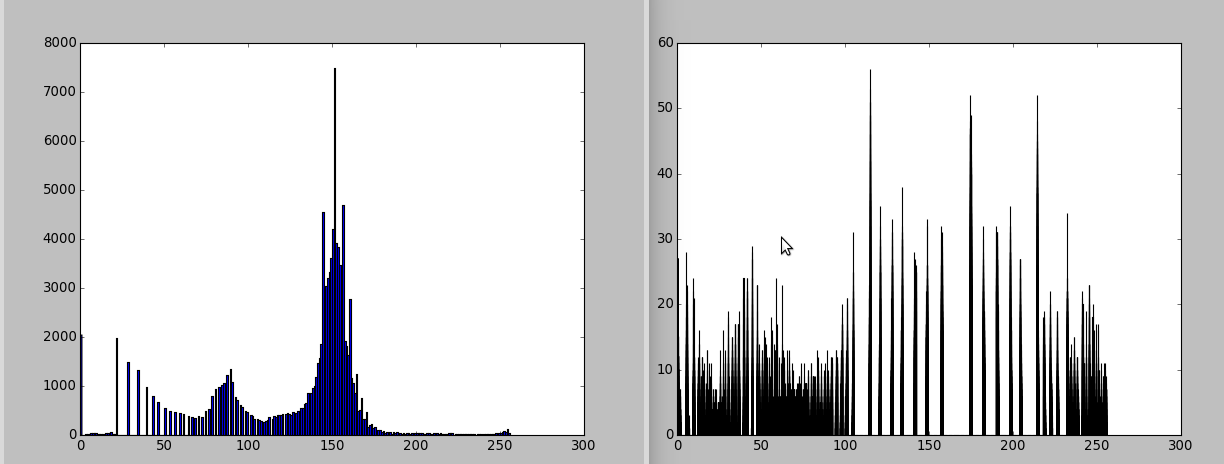

In [8]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_08.png') 

And the plots of the original image of the grayscale before equalization, and the plot of the same greyscale image after undergoing histogram  equalization.

## More Image Preprocessing Techniques

In this section we will explore filtering techniques that are used in the preprocessing before application-specific steps are performed on the image. It is important to remember that images are basically input signals, and just like any other type of signal , we can apply standard signal processing techniques to them, according to our needs and applications.  These filters can be low-pass, high-pass, and band-pass. They can be linear and nonlinear. A low-pass filter will keep low frequencies, and reject high frequencies.  A high-pass filter, on the other hand, will do the inverse, keep high frequencies and reject low frequencies. A band-pass filter will only keep frequencies within a prescribed band, and reject all other frequencies. 
Linear filters usually have a weighted sum associated with it.  This sum includes all the input pixels in the region of interest. An example of an operation that uses a linear low-pass filter is smoothing. Smoothing uses convolution in addition to a Gaussian filter , and use averaging to extract, the largest, and brightest objects in an image, in addition to reducing noise and resulting in a smoother image.

In [ ]:
/thresh.py
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('apple_tag.png')
gray_img = cv2.imread('apple_tag.png',0)
blur = cv2.medianBlur(gray_img,5)

ret,th1 = cv2.threshold(blur,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
images = [img, 0, th1,
          gray_img, 0, th2,
          blur, 0, th3]
titles = ['Original Image','Histogram','GlobalThresholding',
          'Original Gray','Histogram',"Adaptive Mean Thresholding",
          'Gaussian Blur','Histogram',"Adaptive Gaussian Thresholding"]
for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)

    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

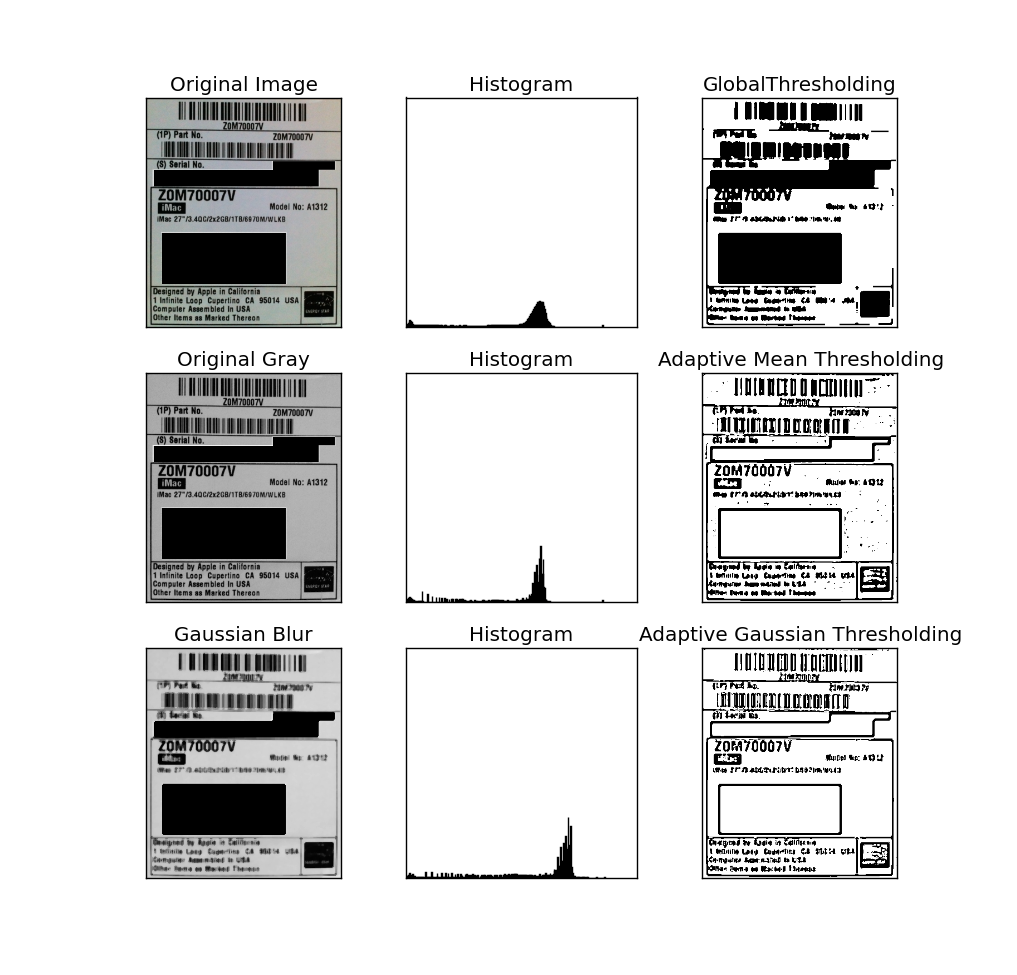

In [2]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_09.png') 

A  high-pass filter can be used in the detection of edges, due to their emphasis on image intensity transition areas. Just as in the case of low-pass filters, high-pass filters can be linear or non-linear. The Laplacian is an example of a linear high-pass filter.  Sobel is an example of a non-linear high-pass filter.
In the following program we can see these high-pass filters put into action,

In [ ]:
//high_pass_filters.py
import cv2
import numpy as np
from matplotlib import pyplot as plt

im = cv2.imread('apple_tag.png',0)

laplacian = cv2.Laplacian(im,cv2.CV_64F)
sobel_x = cv2.Sobel(im,cv2.CV_64F,1,0,ksize=3)
sobel_y = cv2.Sobel(im,cv2.CV_64F,0,1,ksize=3)

plt.subplot(2,2,1),plt.imshow(im,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobel_x,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobel_y,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

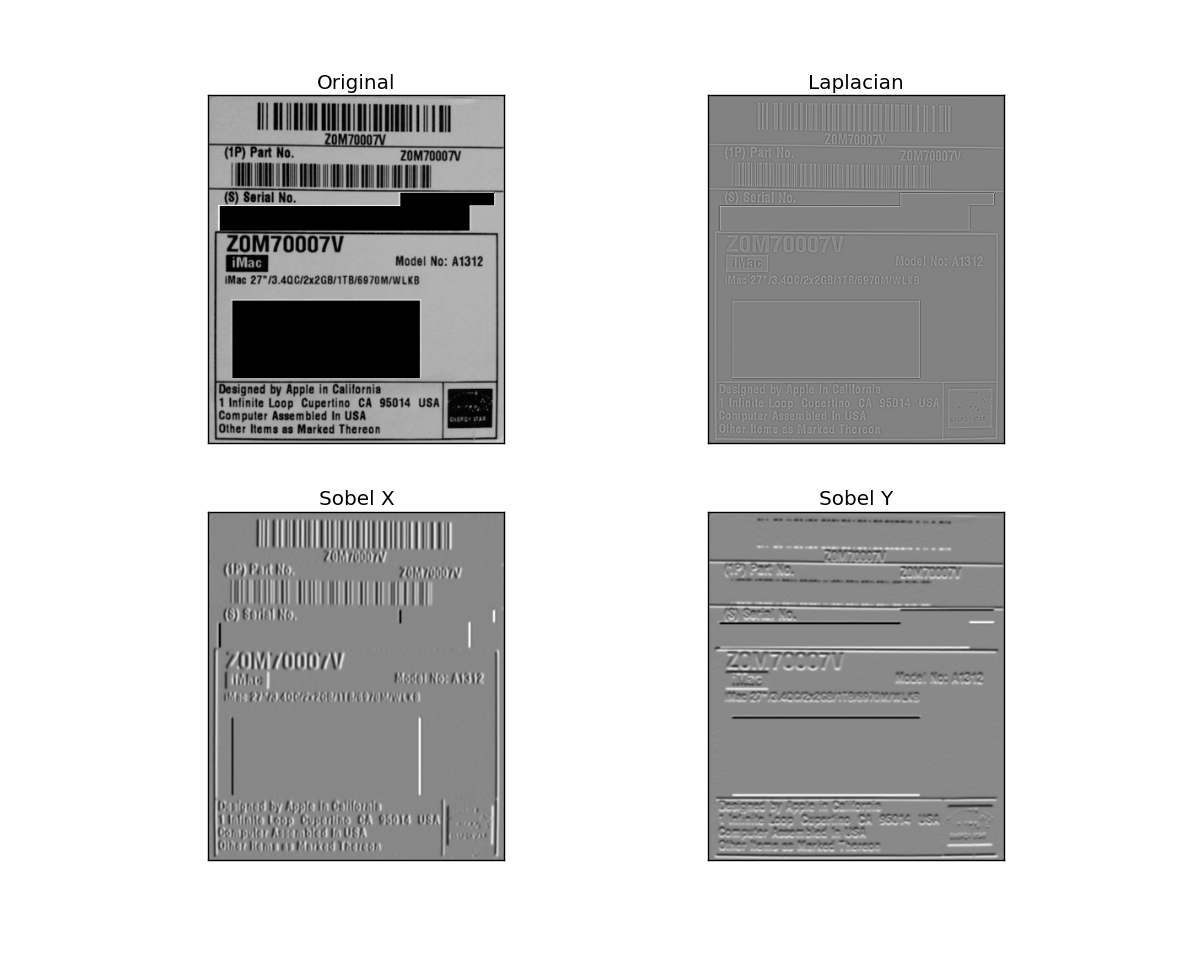

In [3]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_10.png')

with the output of the laplacian and the sobel filters in the image above.

## Using Object Character Recognition for Image to Text 

In this section we are going to use OCR to detect text on an image, and print it into a file.  We will use Tesseract-OCR because it is considered to be the most accurate open source object character recognition software available.
We can easily install it from a linux terminal with the following commands,

shell$ sudo apt-get install tesseract-ocr

and the terminal will look like this,

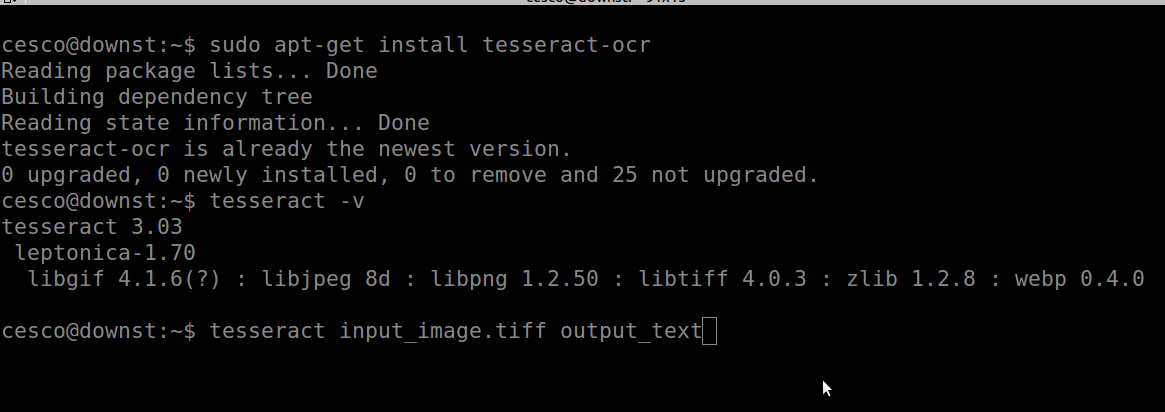

In [4]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_11.png')

We are going to use OCR to read the text on the image that we have been using.  

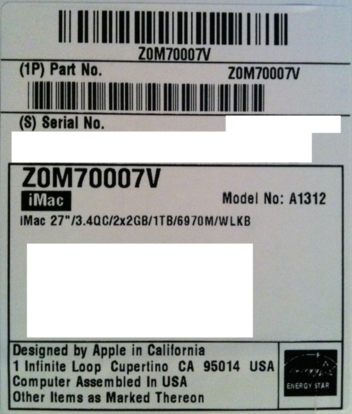

In [5]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_12.png')

The first thing we need to do is convert the image from a png file into a tiff file, and resize it to a higher resolution.  We can easily do this by using ImageMagick with the following command,

Shell$ convert -resize 1000 apple_tag.png apple_tag.tiff

Once we have converted the image to a tiff format, we can apply the OCR with the following command.

Shell$ tesseract apple_tag.tiff output

With this command we are asking tesseract to detect the text on the image and output the text to a text file with the name output.


We can see the contents of the file by opening the output.txt file with your favorite editor, or from a linux terminal with the following command,

Shell$ cat output.txt

and it will output all of the contents of the file,

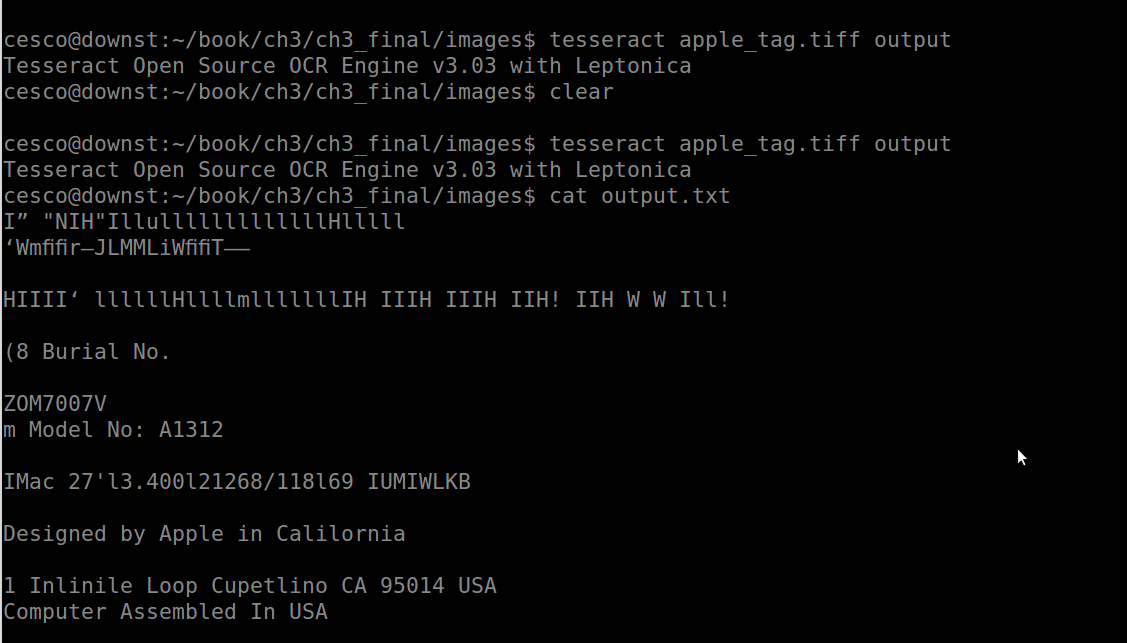

In [6]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_13.png')

As we can see the result it is good, but it is not perfect.  We can improve our results, and optimize the code by using some of the high-pass filters that we have introduced,  and apply them to the image before the OCR step. We can also increase the resolution of the image until we get the desired result. Some of these steps will vary depending on what the reader is trying to achieve.

## Summary

In this chapter we have covered different calibration techniques that can be used in order to calibrate our cameras in order to reduce distortions.  We also introduced ways to generate our own patterns to use in the calibration process.  We covered the Laplacian, Sobel, and Gaussian_filter algorithms to help us in the preprocessing process.  In the next chapter, we will go delve deeper into algorithms that will help us identify and count objects in an image.